In [1]:
#A national used car dealership wants to know how much the should price their used cars at
#to do this we will run a linear regression model on used car data. 
#We will create a model that can take in multiple attributes of a car and return 

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import re



In [3]:
#import csv
df=pd.read_csv("vehicles.csv")

In [4]:
#eda
df.head()


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [7]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

,column_name,percent_missing
county,county,100.000000
size,size,71.767476
cylinders,cylinders,41.622470
condition,condition,40.785232
VIN,VIN,37.725356
drive,drive,30.586347
paint_color,paint_color,30.501078
type,type,21.752717
manufacturer,manufacturer,4.133714
title_status,title_status,1.930753


In [8]:
df = df.drop(columns=['url', 'region_url','image_url','VIN','id','county','lat',"long","posting_date"]) 
#drop url columns no value from these columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  drive         296313 non-null  object 
 12  size          120519 non-null  object 
 13  type          334022 non-null  object 
 14  paint_color   296677 non-null  object 
 15  description   426810 non-null  object 
 16  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(14)
memory usage

In [10]:
df.duplicated().sum()

31695

In [11]:
df= df.drop_duplicates(keep= 'first')

In [ ]:
#df["title_status"].value_counts()


In [ ]:
#df = df[df.title_status == "clean"]
#drop all rows that are not "clean"as it was less than 1% of data model will now only handle "clean titled vehicles"

In [ ]:
#df=df.drop(columns=['title_status'])
#drop column now that all values are "clean"

In [ ]:
df.info()

In [ ]:
df["description"].value_counts()

In [ ]:
#description has valuable info but unsure how to extract it. 

In [ ]:
df["condition"].value_counts()

In [ ]:
df.tail()

In [12]:
def clean_unique_values(df, column_name):
    try:
        # Get unique values from the column
        unique_values = df[column_name].dropna().unique().tolist()
        
        # Clean the list (strip whitespace and convert to string)
        cleaned_values = [str(value).strip() for value in unique_values if pd.notnull(value)]
        
        # Remove duplicates using set and convert back to list
        unique_cleaned_values = list(set(cleaned_values))
        
        return unique_cleaned_values
    except KeyError:
        print(f"Column '{column_name}' not found in DataFrame.")
        return []

# Example usage:

# Assuming df is your DataFrame containing the column 'fuel'
# Replace df with your actual DataFrame

# Call the function to clean and get unique values for 'fuel'

# Print the resulting list of unique, cleaned values for 'fuel'
size = clean_unique_values(df,"size")
paint_color = clean_unique_values(df,"paint_color")
fuel = clean_unique_values(df,"fuel")
drive = clean_unique_values(df,"drive")
condition = clean_unique_values(df,"condition")
manufacturer = clean_unique_values(df,"manufacturer")
cylinders = clean_unique_values(df,"cylinders")
condition = clean_unique_values(df,"condition")
drive = clean_unique_values(df,"drive")
transmission = drive = clean_unique_values(df,"transmission")



In [13]:
keylists = [(size,"size"),(paint_color,"paint_color"),(fuel,"fuel"),(drive,"drive"),(condition,"condition"),(manufacturer,"manufacturer"),(cylinders,"cylinders"),(transmission,"transmission")]

In [14]:
#fuel_keywords = ['gas', 'petrol', 'electric', 'hybrid']
#transmission_keywords = ['automatic', 'manual']
# List of keywords lists and corresponding column names
#keylists = [(fuel_keywords, 'fuel'), (transmission_keywords, 'transmission')]
# Function to extract and fill keywords
def fill_na_with_keywords(row, keylists):
    description = row['description']
    if pd.isna(description):
        return row
    for keywords, col in keylists:
        if pd.isna(row[col]):
            for keyword in keywords:
                if keyword in description.lower():
                    row[col] = keyword
                    break
    return row
# Apply the function to each row
df = df.apply(lambda row: fill_na_with_keywords(row, keylists), axis=1)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395185 entries, 0 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        395185 non-null  object 
 1   price         395185 non-null  int64  
 2   year          394170 non-null  float64
 3   manufacturer  388124 non-null  object 
 4   model         390286 non-null  object 
 5   condition     330855 non-null  object 
 6   cylinders     293780 non-null  object 
 7   fuel          394415 non-null  object 
 8   odometer      391045 non-null  float64
 9   title_status  387274 non-null  object 
 10  transmission  393926 non-null  object 
 11  drive         359962 non-null  object 
 12  size          130274 non-null  object 
 13  type          314034 non-null  object 
 14  paint_color   367491 non-null  object 
 15  description   395126 non-null  object 
 16  state         395185 non-null  object 
dtypes: float64(2), int64(1), object(14)
memory usage: 54.

In [16]:
df.shape

(395185, 17)

In [17]:
def filter_outliers(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df_filtered = df.copy()
    
    for column in numeric_columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        df_filtered = df_filtered.drop(outliers.index, errors='ignore')
    
    return df_filtered

In [115]:
filtered=filter_outliers(df)

In [81]:
filtered.shape

(369499, 17)

In [19]:
filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 369499 entries, 0 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        369499 non-null  object 
 1   price         369499 non-null  int64  
 2   year          368644 non-null  float64
 3   manufacturer  365011 non-null  object 
 4   model         366126 non-null  object 
 5   condition     309919 non-null  object 
 6   cylinders     275812 non-null  object 
 7   fuel          368767 non-null  object 
 8   odometer      365472 non-null  float64
 9   title_status  361847 non-null  object 
 10  transmission  368327 non-null  object 
 11  drive         338827 non-null  object 
 12  size          120173 non-null  object 
 13  type          297252 non-null  object 
 14  paint_color   345814 non-null  object 
 15  description   369440 non-null  object 
 16  state         369499 non-null  object 
dtypes: float64(2), int64(1), object(14)
memory usage: 50.

In [ ]:
plt.hist(filtered["year"])

In [ ]:
plt.hist(filtered["price"])

In [ ]:
plt.hist(filtered["odometer"])

In [ ]:
plt.scatter(filtered['price'],filtered["odometer"])

In [ ]:
filtered.info()

In [82]:
percent_missing = filtered.isnull().sum() * 100 / len(filtered)
missing_value_df = pd.DataFrame({'column_name': filtered.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

,column_name,percent_missing
size,size,67.476773
cylinders,cylinders,25.355143
type,type,19.552692
condition,condition,16.124536
drive,drive,8.300970
paint_color,paint_color,6.410031
title_status,title_status,2.070912
manufacturer,manufacturer,1.214618
odometer,odometer,1.089854
model,model,0.912858


In [116]:
filtered=filtered.drop(columns=["size"])

In [117]:
#usew odometer to fill condition
odometer_bins=[0,25000,50000,75000,100000,150000,1000000]
groups = filtered.groupby(['condition',pd.cut(filtered.odometer,odometer_bins)])
groups.size().unstack()

odometer,"(0, 25000]","(25000, 50000]","(50000, 75000]","(75000, 100000]","(100000, 150000]","(150000, 1000000]"
condition,,,,,,
excellent,5429,9152,11608,15458,29022,17017
fair,414,436,407,634,1679,3288
good,34777,27494,14987,13825,22834,21648
like new,3090,2996,2456,2534,4217,1962
new,8291,9315,8002,8756,12870,7963
salvage,346,496,392,470,818,468


In [118]:
excellent = (filtered["odometer"] > 75000) & (filtered['odometer'] <= 150000)
good = (filtered["odometer"] <= 75000) | (filtered['odometer'] > 150000)

# Fill the missing values in the "condition" column
filtered.loc[excellent, "condition"] = filtered.loc[excellent, "condition"].fillna("excellent")
filtered.loc[good, "condition"] = filtered.loc[good, "condition"].fillna("good")

In [100]:
filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 369499 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   region             369499 non-null  object 
 1   price              369499 non-null  int64  
 2   year               368644 non-null  float64
 3   manufacturer       365011 non-null  object 
 4   model              366126 non-null  object 
 5   condition          368882 non-null  object 
 6   cylinders          368465 non-null  object 
 7   fuel               368767 non-null  object 
 8   odometer           365472 non-null  float64
 9   title_status       361847 non-null  object 
 10  transmission       368327 non-null  object 
 11  drive              338827 non-null  object 
 12  type               360191 non-null  object 
 13  paint_color        345814 non-null  object 
 14  description        369440 non-null  object 
 15  state              369499 non-null  object 
 16  condtio

In [ ]:
#filtered['cylinders'].fillna("drive",inplace = True)
#filtered["drive"].fillna('cylinders', inplace= True)

In [95]:
filtered['cylinders'].value_counts()

cylinders
6 cylinders     84327
4 cylinders     69628
other           59625
8 cylinders     58624
5 cylinders      1553
10 cylinders     1326
3 cylinders       618
12 cylinders      111
Name: count, dtype: int64

In [119]:
model_to_type = filtered.dropna().set_index('model')['type'].to_dict()

#Fill missing values in 'type' based on 'model_to_type' mapping
filtered['type'].fillna(filtered['model'].map(model_to_type), inplace=True)


In [120]:
model_to_type = filtered.dropna().set_index('transmission')['cylinders'].to_dict()

#Fill missing values in 'type' based on 'model_to_type' mapping
filtered['cylinders'].fillna(filtered['transmission'].map(model_to_type), inplace=True)

In [91]:
#model_to_cylidners = filtered.dropna().set_index('model')['cylinders'].to_dict()

# Fill missing values in 'type' based on 'model_to_type' mapping
#filtered['cylinders'].fillna(filtered['model'].map(model_to_type), inplace=True)

In [ ]:
#model_to_drive = filtered.dropna().set_index('model')['drive'].to_dict()

# Fill missing values in 'type' based on 'model_to_type' mapping
#filtered['drive'].fillna(filtered['model'].map(model_to_type), inplace=True)

In [121]:
condition_mapping = {'new': 5,'like new': 4,'excellent': 3,'good': 2,'fair': 1,'salvage': 0}

In [122]:
filtered['condition_numeric'] = filtered['condition'].map(condition_mapping)


(array([  2995.,      0.,   6872.,      0., 137033.,      0.,  89632.,
             0.,  17261.,  56126.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

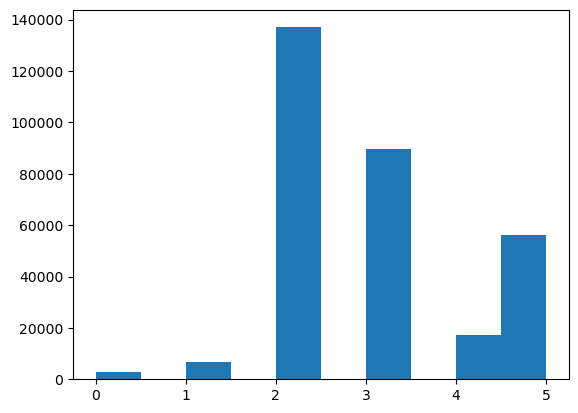

In [24]:
plt.hist(filtered['condition_numeric'])

In [25]:
#filtered["condition_numeric"].fillna(2, inplace=True)

(array([  2995.,      0.,   6872.,      0., 196613.,      0.,  89632.,
             0.,  17261.,  56126.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

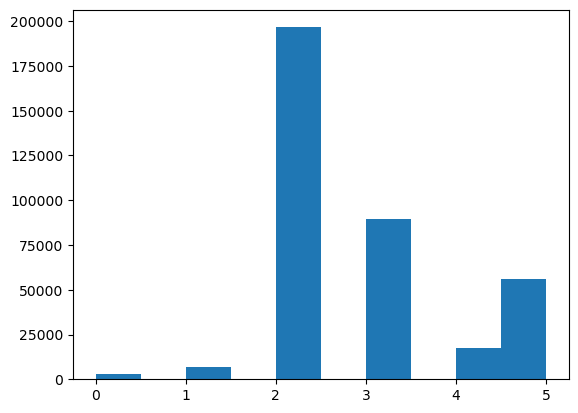

In [26]:
plt.hist(filtered['condition_numeric'])

In [123]:
filtered=filtered.drop(columns=['condition']) 
filtered=filtered.drop(columns=['title_status']) 
filtered=filtered.drop(columns=['description']) 
filtered=filtered.drop(columns=['region']) 


In [127]:
df.fillna(method='ffill', inplace=True)

In [128]:

filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 369499 entries, 0 to 426879
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   price              369499 non-null  int64  
 1   year               368644 non-null  float64
 2   manufacturer       365011 non-null  object 
 3   model              366126 non-null  object 
 4   cylinders          368465 non-null  object 
 5   fuel               368767 non-null  object 
 6   odometer           365472 non-null  float64
 7   transmission       368327 non-null  object 
 8   drive              338827 non-null  object 
 9   type               360191 non-null  object 
 10  paint_color        345814 non-null  object 
 11  state              369499 non-null  object 
 12  condition_numeric  368882 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 39.5+ MB


In [108]:
filtered.shape

(369499, 13)

In [129]:
filtered=filtered.dropna()

In [130]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Iterate over each categorical column and encode
for column in filtered.select_dtypes(include=['object']):
    filtered[column] = label_encoder.fit_transform(filtered[column])


/var/folders/br/kn0p5yrn6d771z_m2v7qll780000gp/T/ipykernel_25409/4038474884.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered[column] = label_encoder.fit_transform(filtered[column])
/var/folders/br/kn0p5yrn6d771z_m2v7qll780000gp/T/ipykernel_25409/4038474884.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered[column] = label_encoder.fit_transform(filtered[column])
/var/folders/br/kn0p5yrn6d771z_m2v7qll780000gp/T/ipykernel_25409/4038474884.py:7: SettingWithCopyWarning: 
A value is trying t

In [131]:
filtered.head()

,price,year,manufacturer,model,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,condition_numeric
27,33590,2014.0,13,15181,6,2,57923.0,2,1,8,10,1,2.0
28,22590,2010.0,7,15460,6,2,71229.0,2,1,8,1,1,2.0
29,39590,2020.0,7,15491,6,2,19160.0,2,1,8,8,1,2.0
30,30990,2017.0,38,17750,6,2,41124.0,2,1,8,8,1,2.0
31,15000,2013.0,12,8013,5,2,128000.0,0,5,10,0,1,3.0


In [132]:
corr=filtered.corr()
corr.style.background_gradient(cmap='coolwarm')

,price,year,manufacturer,model,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,condition_numeric
price,1.000000,0.500045,-0.042775,0.039453,0.315561,0.034717,-0.474131,0.352117,-0.070307,0.052768,0.009167,0.006262,-0.083359
year,0.500045,1.000000,-0.008671,0.012689,0.127757,0.157779,-0.676505,0.298282,-0.076782,0.018692,0.016974,0.012799,0.009870
manufacturer,-0.042775,-0.008671,1.000000,-0.022568,-0.098733,-0.021868,0.010315,0.009213,-0.072971,0.045067,0.009168,-0.011138,0.011442
model,0.039453,0.012689,-0.022568,1.000000,0.056666,0.053834,0.002498,0.014650,-0.125964,-0.101736,0.012623,0.002953,-0.014487
cylinders,0.315561,0.127757,-0.098733,0.056666,1.000000,0.145656,-0.171364,0.373496,0.014007,0.048491,0.024201,0.020478,-0.159909
fuel,0.034717,0.157779,-0.021868,0.053834,0.145656,1.000000,-0.196898,0.282421,0.039282,-0.082488,-0.044496,-0.025844,-0.147205
odometer,-0.474131,-0.676505,0.010315,0.002498,-0.171364,-0.196898,1.000000,-0.420867,-0.059630,-0.002264,-0.003562,0.004399,0.044714
transmission,0.352117,0.298282,0.009213,0.014650,0.373496,0.282421,-0.420867,1.000000,0.083797,0.033748,-0.006117,-0.011720,-0.322972
drive,-0.070307,-0.076782,-0.072971,-0.125964,0.014007,0.039282,-0.059630,0.083797,1.000000,0.105729,0.032270,-0.061928,-0.042632
type,0.052768,0.018692,0.045067,-0.101736,0.048491,-0.082488,-0.002264,0.033748,0.105729,1.000000,0.060827,-0.005545,-0.027986


In [133]:
database=filtered

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [36]:
column_names= ['region',
 'year',
 'manufacturer',
 'model',
 'cylinders',
 'fuel',
 'odometer',
 'transmission',
 'drive',
 'type',
 'paint_color',
 'state',
 'condition_numeric', "price"]
database= database.reindex(columns = column_names)
database.head()

,region,year,manufacturer,model,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,condition_numeric,price
27,16,2014.0,13,13742,6,2,57923.0,2,1,8,10,1,2.0,33590
28,16,2010.0,7,13973,6,2,71229.0,2,1,8,1,1,2.0,22590
29,16,2020.0,7,14003,6,2,19160.0,2,1,8,8,1,2.0,39590
30,16,2017.0,38,16030,6,2,41124.0,2,1,8,8,1,2.0,30990
31,16,2013.0,12,7304,5,2,128000.0,0,5,10,0,1,3.0,15000


In [135]:
model = LinearRegression()
X=database.iloc[:,:-1]
y=database.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [136]:
X_train.shape

(249762, 12)

In [137]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler for X_train
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2=pd.DataFrame(sc_X.transform(X_test))
                        
X_train2.columns= X_train.columns.values
X_test2.columns = X_train.columns.values
                        
X_train2index= X_train.index.values
X_test2.index = X_test.index.values
                        
X_train = X_train2
X_test = X_test2



In [138]:

model.fit(X_train, y_train) # fit a model; consider which predictors should be included
        # calculate the score (R^2 for Regression)
r2 = model.score(X_train, y_train) # calculate the score
        # number of predictors in this model
print(r2)

0.12743667400850733


In [139]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd


# Initialize your model
model = LinearRegression()

# Initialize SequentialFeatureSelector
forward_selector = SequentialFeatureSelector(model, direction="forward", n_features_to_select="auto")

# Fit SequentialFeatureSelector to training data
forward_selector.fit(X_train, y_train)

# Get selected features
selected_features_forward = X_train.columns[forward_selector.get_support()]

print(selected_features_forward)


Index(['year', 'cylinders', 'fuel', 'odometer', 'transmission', 'paint_color'], dtype='object')


In [140]:
X_1=database[['year','cylinders','fuel','odometer','transmission','paint_color']]
y_1=database['price']
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, y_1, test_size = 0.2, random_state = 42)
model1=LinearRegression()
model1.fit(X1_train,y1_train)




LinearRegression()

In [141]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X1_train))
X_test2=pd.DataFrame(sc_X.transform(X1_test))
                        
X_train2.columns= X1_train.columns.values
X_test2.columns = X1_train.columns.values
                        
X_train2index= X1_train.index.values
X_test2.index = X_test.index.values
                        
X1_train = X_train2
X1_test = X_test2


In [142]:
fit = model1.fit(X1_train, y1_train) # fit a model; consider which predictors should be included
        # calculate the score (R^2 for Regression)
r2_1 = model1.score(X1_train, y1_train) # calculate the score
        # number of predictors in this model

In [143]:
print(r2_1)

0.3605015223248559


In [ ]:
#input function